In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets

### Part 1 

In [2]:
#loading the dataset 
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
#Getting descriptive statistics of the dataset

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x = iris["data"][:, 3:]  

#If Iris is Virginica return 1, else 0
Y = (iris["target"] == 2).astype(np.int)  

#If Iris is Versicolor return 1, else 0
Y = (iris["target"] == 1).astype(np.int)

#If Iris is setosa 
Y = (iris["target"] == 0).astype(np.int)

## Part 2

sepal length (cm) setosa


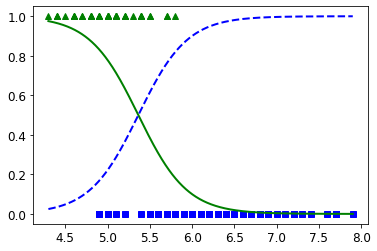

sepal width (cm) setosa


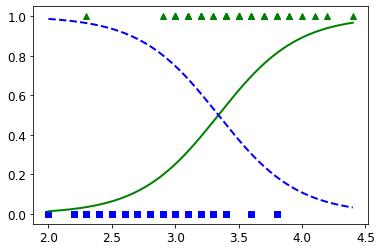

petal length (cm) setosa


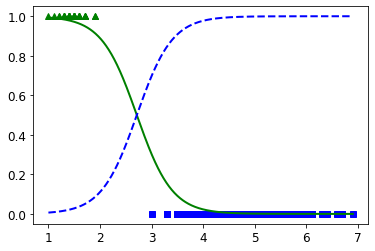

petal width (cm) setosa


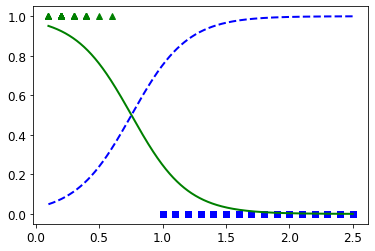

sepal length (cm) versicolor


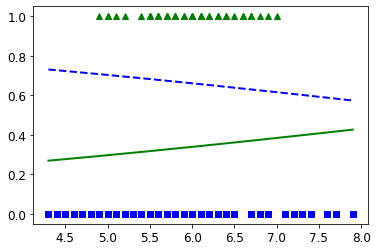

sepal width (cm) versicolor


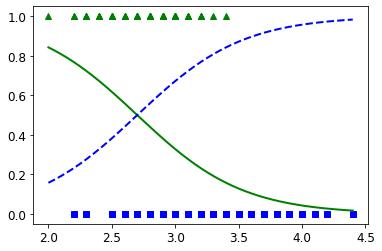

petal length (cm) versicolor


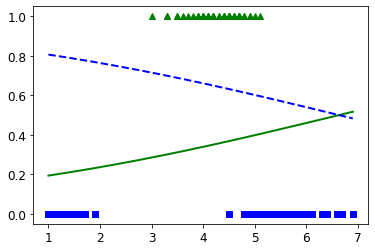

petal width (cm) versicolor


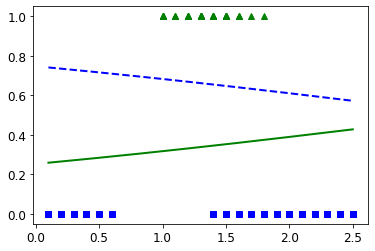

sepal length (cm) virginica


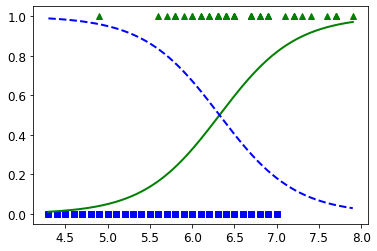

sepal width (cm) virginica


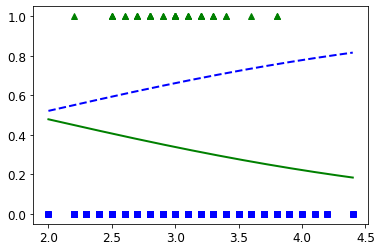

petal length (cm) virginica


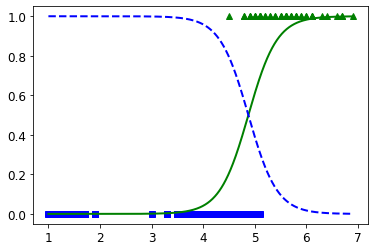

petal width (cm) virginica


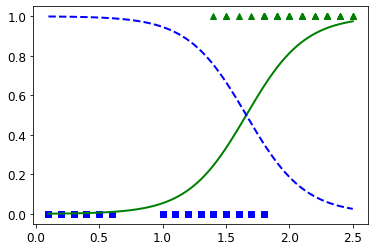

In [5]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import itertools
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
from itertools import product
for class_index, feature_index in itertools.product(range(3), range(4)):
    feature = iris.feature_names[feature_index]
    class_name = iris.target_names[class_index]
    print(feature, class_name)
    
    X=iris["data"][:, feature_index].reshape(150,1)
    y=(iris["target"] == class_index).astype(np.int)
    
    log_reg =LogisticRegression(random_state=1)
    log_reg.fit(X, y)
    
    X_new = np.linspace(min(X), max(X), 1000).reshape(-1,1)
    y_proba =log_reg.predict_proba(X_new)
    
    plt.plot(X[y==0], y[y==0], "bs")
    plt.plot(X[y==1], y[y==1], "g^")
    plt.plot(X_new, y_proba[:,1], "g-", linewidth=2)
    plt.plot(X_new, y_proba[:,0], "b--", linewidth=2)
    plt.show()

## Part 3 

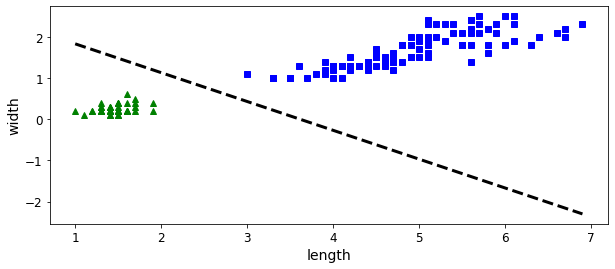

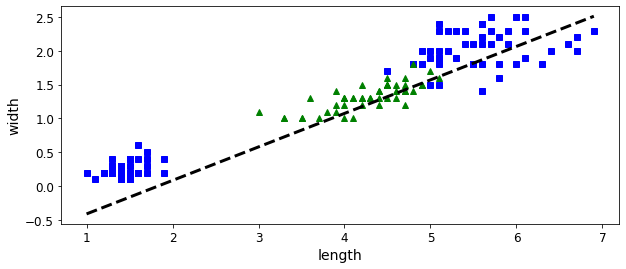

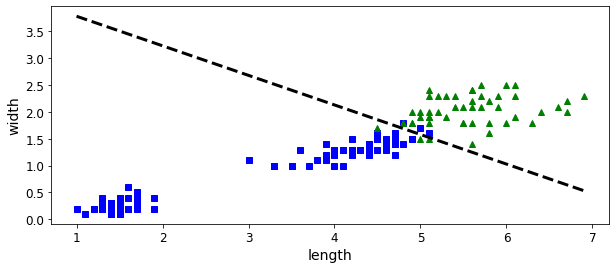

In [6]:
#petal length, petal width

for class_index in itertools.product(range(3)):
    X = iris["data"][:, (2, 3)]
    y = (iris["target"] == class_index).astype(np.int)
    
    log_reg = LogisticRegression(C=10**10, random_state =42)
    log_reg.fit(X, y)
    
    min_max = [np.amin(X, axis=0), np.amax(X, axis=0)]
    x0, x1 = np.meshgrid(np.linspace(min_max[0][0], min_max[1][0],500).reshape(-1, 1), np.linspace(min_max[0][1], min_max[1][1], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_proba = log_reg.predict_proba(X_new)
    
    plt.figure(figsize=(10, 4))
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^")
    
    zz = y_proba[:, 1].reshape(x0.shape)
    
    left_right = np.array([min_max[0][0], min_max[1][0]])
    boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
    
    plt.plot(left_right, boundary, "k--", linewidth=3)
    plt.xlabel("length", fontsize=14)
    plt.ylabel("width", fontsize=14)
    plt.show()

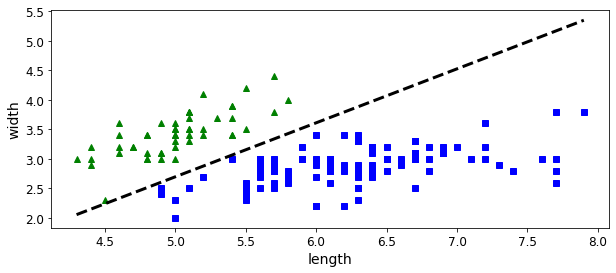

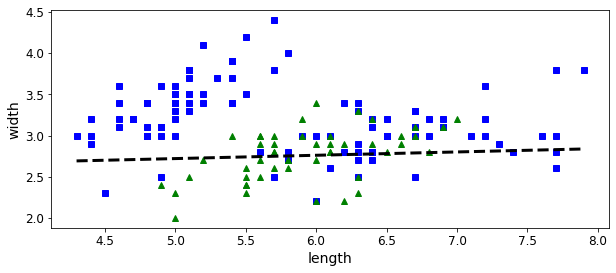

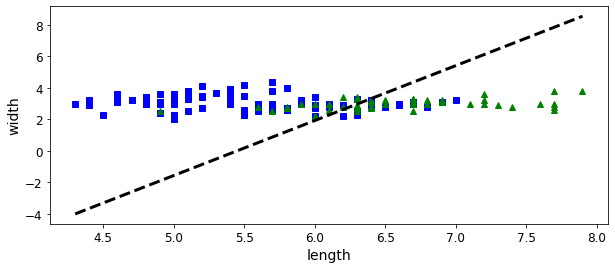

In [7]:
#sepal length, sepal width

for class_index in itertools.product(range(3)):
    X = iris["data"][:, (0, 1)]
    y = (iris["target"] == class_index).astype(np.int)
    
    log_reg = LogisticRegression(C=10**10, random_state=42)
    log_reg.fit(X, y)
    
    min_max = [np.amin(X, axis=0), np.amax(X, axis=0)]
    x0, x1 = np.meshgrid(np.linspace(min_max[0][0], min_max[1][0], 500).reshape(-1, 1), np.linspace(min_max[0][1], min_max[1][1], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_proba = log_reg.predict_proba(X_new)
    
    plt.figure(figsize=(10, 4))
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^")

    zz = y_proba[:, 1].reshape(x0.shape)
    
    left_right = np.array([min_max[0][0], min_max[1][0]])
    boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

    plt.plot(left_right, boundary, "k--", linewidth=3)
    plt.xlabel("length", fontsize=14)
    plt.ylabel("width", fontsize=14)

    plt.show()

## Part 4 

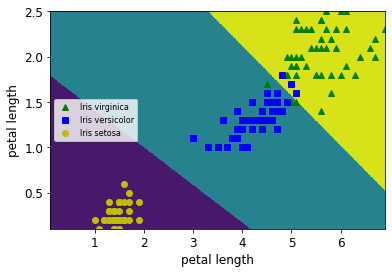

In [8]:
iris = datasets.load_iris()
X = iris.data[:, (2, 3)] # we only take the first two features.
y = iris.target

log_reg=LogisticRegression(C=1e5)
log_reg.fit(X, y)

min_max = [np.amin(X, axis=0),
           np.amax(X, axis=0)]
x0, x1 = np.meshgrid(
    np.linspace(min_max[0][1], min_max[1][0], 500).reshape(-1,1),
    np.linspace(min_max[0][1], min_max[1][1], 200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)
y_pred = log_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_pred.reshape(x0.shape)

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz)
plt.xlabel("petal length", fontsize=12)
plt.ylabel("petal length", fontsize=12)
plt.legend(loc="center left", fontsize=8)

## Thank You 